In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Camera data
path = "CameraData.npy"
raw_data = np.load(path) 
images = [raw_data[:,:,k] for k in xrange(raw_data.shape[2])] # Images are in the list

In [2]:
def show(data, size=(11,16)):
    # Show photo
    plt.figure(figsize=size)
    plt.imshow(data, cmap='gray')
    plt.show()

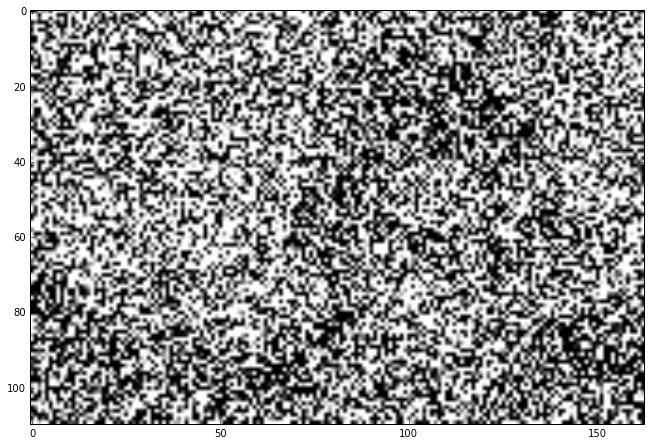